In [14]:

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'20',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '23630727-1910-4a5d-876c-1ed1bedd264d',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  

{'status': {'timestamp': '2023-06-04T12:08:17.362Z', 'error_code': 0, 'error_message': None, 'elapsed': 18, 'credit_count': 1, 'notice': None, 'total_count': 10347}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10241, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [15]:
type(data)

dict

In [16]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [17]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

C:\Users\pc\AppData\Local\Temp\ipykernel_12860\644439384.py:2: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10241,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.939247e+07,1.939247e+07,False,NaN,1,NaN,NaN,None,2023-06-04T12:05:00.000Z,27196.108589,8.752806e+09,-21.3213,-0.084793,0.190113,0.090249,-6.852198,-4.860013,21.503066,5.273997e+11,45.8959,5.711183e+11,None,2023-06-04T12:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-04 12:08:18.467547
1,1027,Ethereum,ETH,ethereum,6967,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202361e+08,1.202361e+08,True,NaN,2,NaN,NaN,None,2023-06-04T12:05:00.000Z,1903.733688,3.363487e+09,-27.0807,-0.060692,-0.045493,3.202367,-0.548098,-0.606052,21.754698,2.288976e+11,19.9197,2.288976e+11,None,2023-06-04T12:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-04 12:08:18.467547
2,825,Tether,USDT,tether,55010,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.315249e+10,8.609064e+10,True,NaN,3,NaN,NaN,None,2023-06-04T12:05:00.000Z,1.000408,1.347439e+10,-18.7496,0.012458,0.012002,0.013638,-0.015037,0.025447,0.032472,8.318646e+10,7.2393,8.612580e+10,None,2023-06-04T12:05:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-06-04 12:08:18.467547
3,1839,BNB,BNB,bnb,1445,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558559e+08,1.558559e+08,False,NaN,4,NaN,NaN,None,2023-06-04T12:05:00.000Z,306.979653,2.525899e+08,-15.7731,-0.119855,0.175935,-0.263445,-5.786141,-2.847745,8.036349,4.784458e+10,4.1637,4.784458e+10,None,2023-06-04T12:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-04 12:08:18.467547
4,3408,USD Coin,USDC,usd-coin,12813,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.890944e+10,2.890944e+10,False,NaN,5,NaN,NaN,None,2023-06-04T12:05:00.000Z,0.999981,1.802233e+09,-21.7879,0.005083,0.002407,-0.000772,-0.014600,0.019782,-0.003890,2.890888e+10,2.5159,2.890888e+10,None,2023-06-04T12:05:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-06-04 12:08:18.467547
5,52,XRP,XRP,xrp,959,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.198702e+10,9.998888e+10,False,NaN,6,NaN,NaN,None,2023-06-04T12:05:00.000Z,0.524726,5.946514e+08,-32.5822,0.002139,0.293801,10.912982,13.577247,1.723422,44.997714,2.727892e+10,2.3740,5.247256e+10,None,2023-06-04T12:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-04 12:08:18.467547
6,2010,Cardano,ADA,cardano,819,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.489413e+10,3.584278e+10,False,NaN,7,NaN,NaN,None,2023-06-04T12:05:00.000Z,0.380308,1.290620e+08,-7.8751,-0.037900,1.087833,0.986268,-2.346235,-4.698966,14.704284,1.327052e+10,1.1549,1.711386e+10,None,2023-06-04T12:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-04 12:08:18.467547
7,74,Dogecoin,DOGE,dogecoin,718,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.396259e+11,1.396259e+11,True,NaN,8,NaN,NaN,None,2023-06-04T12:05:00.000Z,0.072888,1.154204e+08,-23.5821,-0.103677,0.431845,0.509421,-7.434364,-25.604594,-1.214264,1.017705e+10,0.8857,1.017705e+10,None,2023-06-04T12:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-04 12:08:18.467547
8,5426,Solana,SOL,solana,468,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.9696

In [32]:
def API_runner():

    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'20',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '23630727-1910-4a5d-876c-1ed1bedd264d',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
  


    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df 
    
    if not os.path.isfile(r"C:\Users\pc\Desktop\API.csv"):
        df.to_csv(r"C:\Users\pc\Desktop\API.csv", header = 'column_names')
    else:
        df.to_csv(r"C:\Users\pc\Desktop\API.csv", mode = 'a', header=False)


In [33]:
import os
from time import time
from time import sleep 

for i in range(200):
    API_runner()
    print('api runner completed with success')
    sleep(60)
exit() 

{'status': {'timestamp': '2023-06-04T12:45:17.763Z', 'error_code': 0, 'error_message': None, 'elapsed': 19, 'credit_count': 1, 'notice': None, 'total_count': 10347}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10241, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

C:\Users\pc\AppData\Local\Temp\ipykernel_12860\3257854416.py:28: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


{'status': {'timestamp': '2023-06-04T12:46:18.159Z', 'error_code': 0, 'error_message': None, 'elapsed': 17, 'credit_count': 1, 'notice': None, 'total_count': 10347}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10241, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

C:\Users\pc\AppData\Local\Temp\ipykernel_12860\3257854416.py:28: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


{'status': {'timestamp': '2023-06-04T12:47:18.681Z', 'error_code': 0, 'error_message': None, 'elapsed': 36, 'credit_count': 1, 'notice': None, 'total_count': 10347}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10241, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

C:\Users\pc\AppData\Local\Temp\ipykernel_12860\3257854416.py:28: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


KeyboardInterrupt: 

In [34]:
df33 = pd.read_csv(r"C:\Users\pc\Desktop\API.csv")
df33

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10241,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.939254e+07,1.939254e+07,False,NaN,1,NaN,NaN,NaN,2023-06-04T12:43:00.000Z,27212.107694,8.834040e+09,-16.8305,-0.032322,0.123560,0.262605,-6.053274,-4.418273,21.451936,5.277120e+11,45.9251,5.714543e+11,NaN,2023-06-04T12:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-04 12:45:08.050917
1,1,1027,Ethereum,ETH,ethereum,6967,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202361e+08,1.202361e+08,True,NaN,2,NaN,NaN,NaN,2023-06-04T12:43:00.000Z,1905.271210,3.382023e+09,-22.6452,0.056995,-0.010980,3.477497,0.218870,-0.193688,21.711970,2.290824e+11,19.9361,2.290824e+11,NaN,2023-06-04T12:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-04 12:45:08.050917
2,2,825,Tether,USDT,tether,55010,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.315249e+10,8.609064e+10,True,NaN,3,NaN,NaN,NaN,2023-06-04T12:43:00.000Z,1.000375,1.353941e+10,-14.7885,0.018229,0.001675,0.011921,-0.017772,0.023610,0.030146,8.318371e+10,7.2391,8.612296e+10,NaN,2023-06-04T12:43:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-06-04 12:45:08.050917
3,3,1839,BNB,BNB,bnb,1445,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.558558e+08,1.558558e+08,False,NaN,4,NaN,NaN,NaN,2023-06-04T12:43:00.000Z,306.850278,2.526870e+08,-12.6610,-0.117730,-0.029599,-0.258097,-5.478000,-2.712514,7.792355,4.782441e+10,4.1620,4.782441e+10,NaN,2023-06-04T12:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-04 12:45:08.050917
4,4,3408,USD Coin,USDC,usd-coin,12813,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,2.890943e+10,2.890943e+10,False,NaN,5,NaN,NaN,NaN,2023-06-04T12:43:00.000Z,0.999956,1.819522e+09,-16.4560,0.019420,-0.002471,-0.006550,-0.017074,0.018600,-0.005916,2.890815e+10,2.5159,2.890815e+10,NaN,2023-06-04T12:43:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-06-04 12:45:08.050917
5,5,52,XRP,XRP,xrp,959,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.198702e+10,9.998888e+10,False,NaN,6,NaN,NaN,NaN,2023-06-04T12:43:00.000Z,0.524549,5.851958e+08,-31.8645,-0.037544,0.381718,11.012742,14.298230,2.546772,44.590367,2.726976e+10,2.3733,5.245495e+10,NaN,2023-06-04T12:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-04 12:45:08.050917
6,6,2010,Cardano,ADA,cardano,819,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.489413e+10,3.584278e+10,False,NaN,7,NaN,NaN,NaN,2023-06-04T12:43:00.000Z,0.380231,1.287691e+08,-5.0005,-0.043545,1.011745,0.891699,-1.498926,-3.935285,14.626556,1.326784e+10,1.1546,1.711040e+10,NaN,2023-06-04T12:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-04 12:45:08.050917
7,7,74,Dogecoin,DOGE,dogecoin,718,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.396270e+11,1.396270e+11,True,NaN,8,NaN,NaN,NaN,2023-06-04T12:43:00.000Z,0.072788,1.171831e+08,-18.6705,-0.085145,0.237124,0.639712,-6.666383,-25.234457,-1.533516,1.016322e+10,0.8845,1.016322e+10,NaN,2023-06-04T12:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-04 12:45:08.050917
8,8,5426,Solana,SOL,solana,468,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h.

In [35]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [36]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10241,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19392543.00000,19392543.00000,False,NaN,1,NaN,NaN,None,2023-06-04T12:45:00.000Z,27217.27394,8842549966.77950,-16.37600,0.08477,0.14606,0.24966,-6.10302,-4.42226,21.46621,527812155226.59436,45.91440,571562752742.56006,None,2023-06-04T12:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-04 12:47:08.972943
1,1027,Ethereum,ETH,ethereum,6967,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120236126.76774,120236126.76774,True,NaN,2,NaN,NaN,None,2023-06-04T12:45:00.000Z,1905.23902,3381052043.65454,-22.52090,0.11993,-0.01251,3.44926,0.11833,-0.22332,21.70504,229078560705.27512,19.93580,229078560705.28000,None,2023-06-04T12:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-04 12:47:08.972943
2,825,Tether,USDT,tether,55010,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83152494318.89395,86090638895.02290,True,NaN,3,NaN,NaN,None,2023-06-04T12:45:00.000Z,1.00039,13536637266.34706,-14.63660,0.01603,0.00155,-0.00149,-0.01604,0.03220,0.03122,83185101781.64830,7.23930,86124398523.33000,None,2023-06-04T12:45:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-06-04 12:47:08.972943
3,1839,BNB,BNB,bnb,1445,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,155855848.74727,155855848.74727,False,NaN,4,NaN,NaN,None,2023-06-04T12:45:00.000Z,306.86338,252549454.61501,-12.09360,-0.10482,-0.03504,-0.25114,-5.50551,-2.72954,7.77748,47826453148.08278,4.16210,47826453148.08000,None,2023-06-04T12:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-04 12:47:08.972943
4,3408,USD Coin,USDC,usd-coin,12813,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,28909431559.82301,28909431559.82301,False,NaN,5,NaN,NaN,None,2023-06-04T12:45:00.000Z,0.99998,1827103997.20083,-16.00230,0.01608,-0.00090,-0.02033,-0.00804,0.01163,-0.00462,28908905409.84654,2.51500,28908905409.85000,None,2023-06-04T12:45:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-06-04 12:47:08.972943
5,52,XRP,XRP,xrp,959,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,51987017573.00000,99988884267.00000,False,NaN,6,NaN,NaN,None,2023-06-04T12:45:00.000Z,0.52455,585005986.70735,-31.77910,-0.04387,0.38246,11.01238,14.28213,2.52847,44.57529,27269928963.43774,2.37240,52455267173.47000,None,2023-06-04T12:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-04 12:47:08.972943
6,2010,Cardano,ADA,cardano,819,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34894128709.89700,35842779602.84000,False,NaN,7,NaN,NaN,None,2023-06-04T12:45:00.000Z,0.38026,128776263.32811,-4.80170,-0.01658,1.00962,0.88912,-1.50930,-3.93651,14.60997,13268747310.38768,1.15470,17111578682.24000,None,2023-06-04T12:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-04 12:47:08.972943
7,74,Dogecoin,DOGE,dogecoin,718,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,139626976383.70526,139626976383.70526,True,NaN,8,NaN,NaN,None,2023-06-04T12:45:00.000Z,0.07280,117346833.19598,-18.49030,-0.06723,0.24618,0.65963,-6.67387,-25.25625,-1.53111,10164367137.24013,0.88460,10164367137.24000,None,2023-06-04T12:45:00.000Z,

In [38]:
df69 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df69



,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.08477,0.14606,0.24966,-6.10302,-4.42226,21.46621
Ethereum,0.11993,-0.01251,3.44926,0.11833,-0.22332,21.70504
Tether,0.01603,0.00155,-0.00149,-0.01604,0.03220,0.03122
BNB,-0.10482,-0.03504,-0.25114,-5.50551,-2.72954,7.77748
USD Coin,0.01608,-0.00090,-0.02033,-0.00804,0.01163,-0.00462
XRP,-0.04387,0.38246,11.01238,14.28213,2.52847,44.57529
Cardano,-0.01658,1.00962,0.88912,-1.50930,-3.93651,14.60997
Dogecoin,-0.06723,0.24618,0.65963,-6.67387,-25.25625,-1.53111
Solana,0.48369,2.42549,5.94713,-0.21237,3.61945,5.07162


In [39]:
df69 = df69.stack()
df69

name                                         
Bitcoin          quote.USD.percent_change_1h      0.08477
                 quote.USD.percent_change_24h     0.14606
                 quote.USD.percent_change_7d      0.24966
                 quote.USD.percent_change_30d    -6.10302
                 quote.USD.percent_change_60d    -4.42226
                 quote.USD.percent_change_90d    21.46621
Ethereum         quote.USD.percent_change_1h      0.11993
                 quote.USD.percent_change_24h    -0.01251
                 quote.USD.percent_change_7d      3.44926
                 quote.USD.percent_change_30d     0.11833
                 quote.USD.percent_change_60d    -0.22332
                 quote.USD.percent_change_90d    21.70504
Tether           quote.USD.percent_change_1h      0.01603
                 quote.USD.percent_change_24h     0.00155
                 quote.USD.percent_change_7d     -0.00149
                 quote.USD.percent_change_30d    -0.01604
                 quote.USD

In [40]:
type(df69)

pandas.core.series.Series

In [48]:
df01 = df69.to_frame(name="VVS")
df01

VVS
name                                                  
Bitcoin         quote.USD.percent_change_1h    0.08477
                quote.USD.percent_change_24h   0.14606
                quote.USD.percent_change_7d    0.24966
                quote.USD.percent_change_30d  -6.10302
                quote.USD.percent_change_60d  -4.42226
                quote.USD.percent_change_90d  21.46621
Ethereum        quote.USD.percent_change_1h    0.11993
                quote.USD.percent_change_24h  -0.01251
                quote.USD.percent_change_7d    3.44926
                quote.USD.percent_change_30d   0.11833
                quote.USD.percent_change_60d  -0.22332
                quote.USD.percent_change_90d  21.70504
Tether          quote.USD.percent_change_1h    0.01603
                quote.USD.percent_change_24h   0.00155
                quote.USD.percent_change_7d   -0.00149
                quote.USD.percent_change_30d  -0.01604
                quote.USD.percent_change_60d   0.03220
                quote.USD.percent_change_90d   0.03122
BNB             quote.USD.percent_change_1h   -0.10482
                quote.USD.percent_change_24h  -0.03504
                quote.USD.percent_change_7d   -0.25114
                quote.USD.percent_change_30d  -5.50551
                quote.USD.percent_change_60d  -2.72954
                quote.USD.percent_change_90d   7.77748
USD Coin        quote.USD.percent_change_1h    0.01608
                quote.USD.percent_change_24h  -0.00090
                quote.USD.percent_change_7d   -0.02033
                quote.USD.percent_change_30d  -0.00804
                quote.USD.percent_change_60d   0.01163
                quote.USD.percent_change_90d  -0.00462
XRP             quote.USD.percent_change_1h   -0.04387
                quote.USD.percent_change_24h   0.38246
                quote.USD.percent_change_7d   11.01238
                quote.USD.percent_change_30d  14.28213
                quote.USD.percent_change_60d   2.52847
                quote.USD.percent_change_90d  44.57529
Cardano         quote.USD.percent_change_1h   -0.01658
                quote.USD.percent_change_24h   1.00962
                quote.USD.percent_change_7d    0.88912
                quote.USD.percent_change_30d  -1.50930
                quote.USD.percent_change_60d  -3.93651
                quote.USD.percent_change_90d  14.60997
Dogecoin        quote.USD.percent_change_1h   -0.06723
                quote.USD.percent_change_24h   0.24618
                quote.USD.percent_change_7d    0.65963
                quote.USD.percent_change_30d  -6.67387
                quote.USD.percent_change_60d -25.25625
                quote.USD.percent_change_90d  -1.53111
Solana          quote.USD.percent_change_1h    0.48369
                quote.USD.percent_change_24h   2.42549
                quote.USD.percent_change_7d    5.94713
                quote.USD.percent_change_30d  -0.21237
                quote.USD.percent_change_60d   3.61945
                quote.USD.percent_change_90d   5.07162
Polygon         quote.USD.percent_change_1h   -0.08731
                quote.USD.percent_change_24h  -0.47121
                quote.USD.percent_change_7d   -2.13891
                quote.USD.percent_change_30d  -8.37959
                quote.USD.percent_change_60d -21.17559
                quote.USD.percent_change_90d -19.58447
TRON            quote.USD.percent_change_1h   -0.05163
                quote.USD.percent_change_24h  -3.49451
                quote.USD.percent_change_7d    6.07897
                quote.USD.percent_change_30d  16.89071
                quote.USD.percent_change_60d  23.26504
                quote.USD.percent_change_90d  21.99597
Litecoin        quote.USD.percent_change_1h   -0.15592
                quote.USD.percent_change_24h  -0.93437
                quote.USD.percent_change_7d    7.66171
                quote.USD.percent_change_30d  10.12532
                quote.USD.percent_change_60d   2.19882
                quote.USD.percent_ch

In [49]:
df01 = df01.reset_index()
df01

,name,level_1,VVS
0,Bitcoin,quote.USD.percent_change_1h,0.08477
1,Bitcoin,quote.USD.percent_change_24h,0.14606
2,Bitcoin,quote.USD.percent_change_7d,0.24966
3,Bitcoin,quote.USD.percent_change_30d,-6.10302
4,Bitcoin,quote.USD.percent_change_60d,-4.42226
5,Bitcoin,quote.USD.percent_change_90d,21.46621
6,Ethereum,quote.USD.percent_change_1h,0.11993
7,Ethereum,quote.USD.percent_change_24h,-0.01251
8,Ethereum,quote.USD.percent_change_7d,3.44926
9,Ethereum,quote.USD.percent_change_30d,0.11833


In [61]:
df01 = df01.rename(columns={'level_1':'percent_change'})

In [70]:
df01['percent_change']=df01['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df01


,name,percent_change,VVS
0,Bitcoin,1h,0.08477
1,Bitcoin,24h,0.14606
2,Bitcoin,7d,0.24966
3,Bitcoin,30d,-6.10302
4,Bitcoin,60d,-4.42226
5,Bitcoin,90d,21.46621
6,Ethereum,1h,0.11993
7,Ethereum,24h,-0.01251
8,Ethereum,7d,3.44926
9,Ethereum,30d,0.11833


In [63]:
import seaborn as sns 
import matplotlib.pyplot as plt

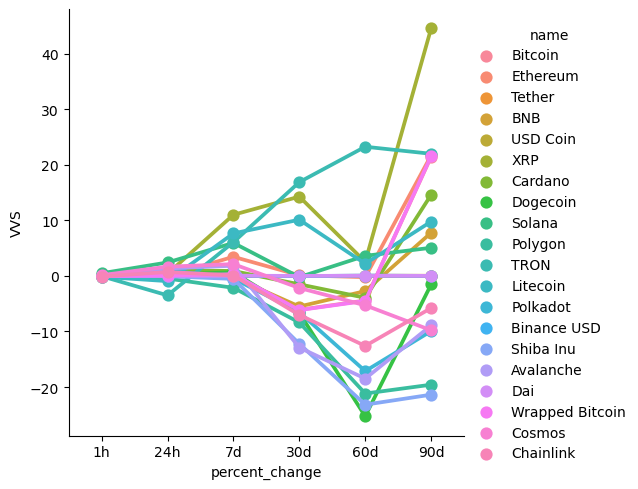

In [71]:
sns.catplot(x='percent_change', y='VVS', hue='name', data=df01, kind='point')